<a href="https://colab.research.google.com/github/ochekroun/labs/blob/master/IFAGE_Cours_4_Augmentation_de_donn%C3%A9es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐶 Augmentation de données

In [ ]:
!pip install -U keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 11.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.1.1 which is incompatible.


## 📚 Jeu de donnée

On utilise le jeu de données *Stanford Dogs* qui contient plus de 20k images de chiens de 120 races différentes.
Plus d'informations : http://vision.stanford.edu/aditya86/ImageNetDogs/main.html

Pour le télécharger on utilise `tfds`. L'identifiant du jeu de données est `stanford_dogs`:

https://www.tensorflow.org/datasets/catalog/stanford_dogs

In [ ]:
import tensorflow_datasets as tfds

dataset_name = "stanford_dogs"

(ds_train, ds_test), ds_info = tfds.load(
    dataset_name, split=["train", "test"], with_info=True, as_supervised=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/12000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/stanford_dogs/0.2.0.incompleteABBWU2/stanford_dogs-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/8580 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/stanford_dogs/0.2.0.incompleteABBWU2/stanford_dogs-test.tfrecord*...:   0%…

Dataset stanford_dogs downloaded and prepared to /root/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.


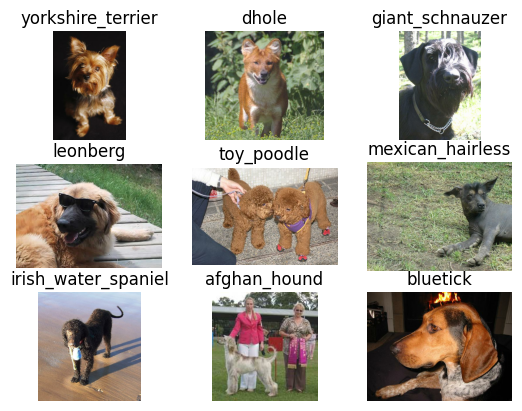

In [ ]:
import matplotlib.pyplot as plt

label_info = ds_info.features["label"]
def format_label(label):
    # on retire le préfixe du nom de chaque classe
    string_label = label_info.int2str(label)
    return string_label.split("-")[1]

for i, (image, label) in enumerate(ds_train.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title("{}".format(format_label(label)))
    plt.axis("off")

## ↔️ Redimensionnons les images

La taille des images utilisée pour l'entraînement doit correspondre à la taille attendue par le modèle !

In [ ]:
IMG_SIZE = 224

In [ ]:
import tensorflow as tf

# on redimensionne les images à la bonne taille
size = (IMG_SIZE, IMG_SIZE)
ds_train = ds_train.map(lambda image, label: (tf.image.resize(image, size), label))
ds_test = ds_test.map(lambda image, label: (tf.image.resize(image, size), label))

## ⚛️ Augmentation des données

Vous pouvez trouver plus d'augmentations ici :

https://keras.io/api/layers/preprocessing_layers/image_augmentation/

In [ ]:
from keras import layers
import numpy as np

img_augmentation_layers = [
    layers.RandomRotation(factor=0.15),
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    layers.RandomFlip(),
    layers.RandomContrast(factor=0.9),
]

def img_augmentation(images):
    for layer in img_augmentation_layers:
        images = layer(images)
    return images

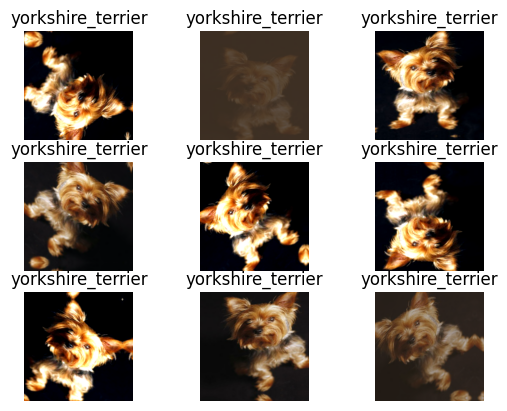

In [ ]:
for image, label in ds_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        aug_img = img_augmentation(np.expand_dims(image.numpy(), axis=0))
        aug_img = np.array(aug_img)
        plt.imshow(aug_img[0].astype("uint8"))
        plt.title("{}".format(format_label(label)))
        plt.axis("off")

In [ ]:
from keras.utils import to_categorical

def input_preprocess_train(image, label):
    # Augmentation des données
    image = img_augmentation(image)
    return image, label

def input_preprocess_test(image, label):
    return image, label

BATCH_SIZE = 64
ds_train_preprocessed = ds_train.map(input_preprocess_train)
ds_train_batches = ds_train_preprocessed.batch(batch_size=BATCH_SIZE)

ds_test_preprocessed = ds_test.map(input_preprocess_test)
ds_test_batches = ds_test_preprocessed.batch(batch_size=BATCH_SIZE)

## Regardons les données après ces étapes

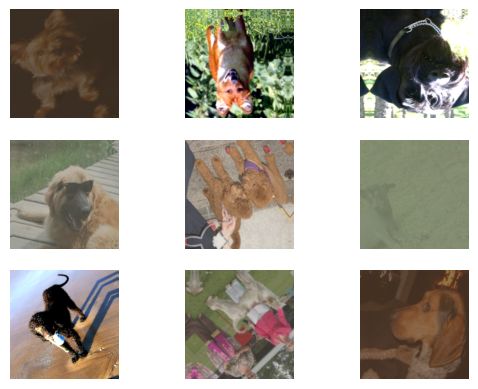

In [ ]:
for i, (image, label) in enumerate(ds_train_preprocessed.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.axis("off")